<a href="https://colab.research.google.com/github/Savitha-Devi/Audioprocessing2025/blob/main/Dereverb_Project_VPS_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from IPython.display import Audio

In [2]:
#Step 1 - loading dry clean audio
dry_audio, sr = librosa.load(librosa.ex('libri1'), sr=None)
print(f"Loaded dry audio with sample rate: {sr}")
Audio(dry_audio, rate=sr)

Loaded dry audio with sample rate: 22050


In [3]:
# Step 2: Create synthetic Room Impulse Response (RIR)
rir_duration = 0.3  # seconds
rir = np.exp(-np.linspace(0, 3, int(sr * rir_duration)))  # Exponential decay
rir[0] = 1  # Direct path
rir = rir / np.linalg.norm(rir)  # Normalize

In [4]:
# Step 3: Convolve dry audio with RIR
reverb_audio = convolve(dry_audio, rir, mode='full')
reverb_audio /= np.max(np.abs(reverb_audio))  # Normalize

# Listen to reverberated version
Audio(reverb_audio, rate=sr)

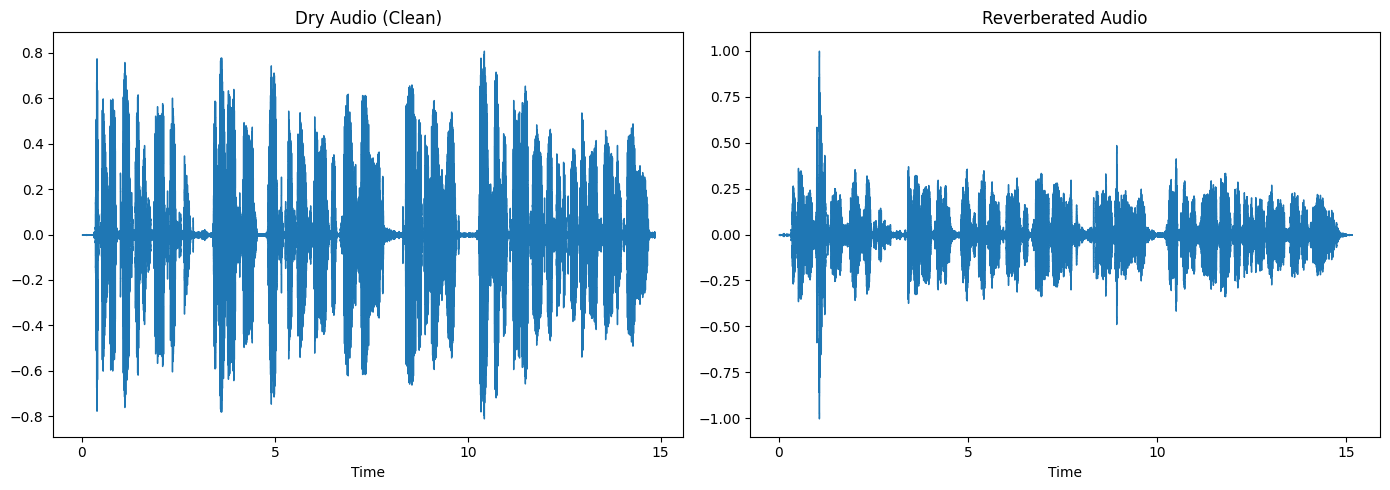

In [5]:
# Step 4: Compare Waveforms
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
librosa.display.waveshow(dry_audio, sr=sr)
plt.title('Dry Audio (Clean)')

plt.subplot(1, 2, 2)
librosa.display.waveshow(reverb_audio, sr=sr)
plt.title('Reverberated Audio')
plt.tight_layout()
plt.show()

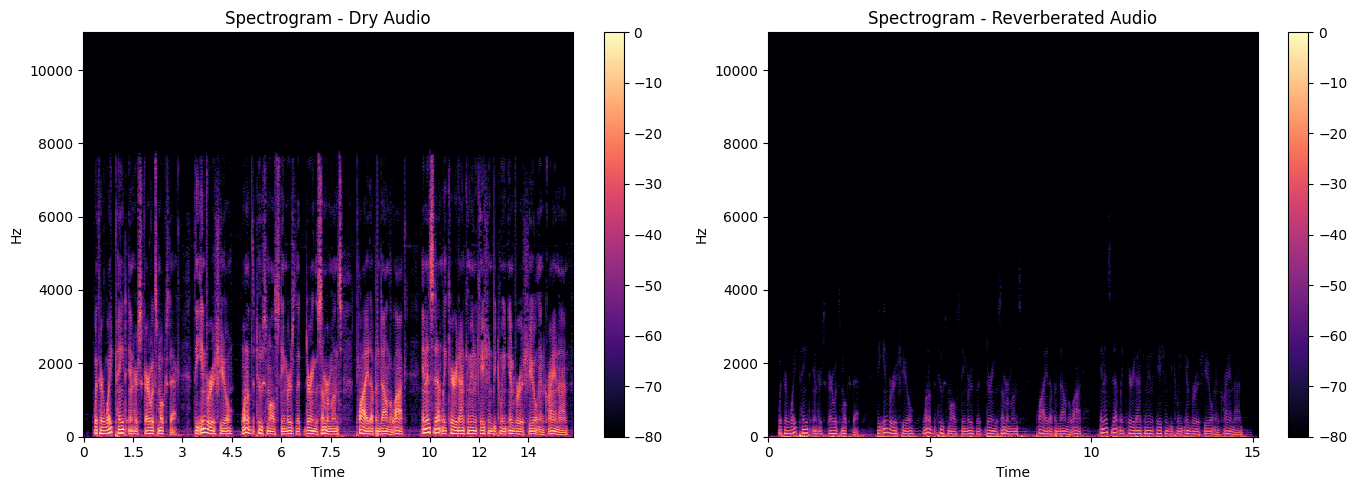

In [6]:
# Step 5: Compare Spectrograms
plt.figure(figsize=(14, 5))

# Dry audio spectrogram
plt.subplot(1, 2, 1)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(dry_audio)), ref=np.max)
librosa.display.specshow(D1, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram - Dry Audio')
plt.colorbar()

# Reverberated audio spectrogram
plt.subplot(1, 2, 2)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(reverb_audio)), ref=np.max)
librosa.display.specshow(D2, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram - Reverberated Audio')
plt.colorbar()

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal
import soundfile as sf


In [8]:
# 1. Load or generate dry audio
dry_audio, sr = librosa.load(librosa.example('trumpet'), sr=None)
dry_audio = dry_audio[:sr*2]  # Take only first 2 seconds

In [9]:
# 2. Create a synthetic Impulse Response (RIR)
rir = np.zeros(int(0.5 * sr))
rir[0] = 1                  # Direct sound
rir[int(0.05 * sr)] = 0.6   # First reflection
rir[int(0.1 * sr)] = 0.3    # Second reflection
rir[int(0.15 * sr)] = 0.1   # Third reflection

In [10]:
# Normalize RIR
rir /= np.linalg.norm(rir)


In [11]:
# 3. Convolution (Time domain)
reverb_time = scipy.signal.convolve(dry_audio, rir, mode='full')


In [12]:
# 4. Convolution (Frequency domain - faster for long signals)
reverb_fft = scipy.signal.fftconvolve(dry_audio, rir, mode='full')

# Save for listening (if needed)
sf.write('dry_audio.wav', dry_audio, sr)
sf.write('reverb_time.wav', reverb_time, sr)
sf.write('reverb_fft.wav', reverb_fft, sr)

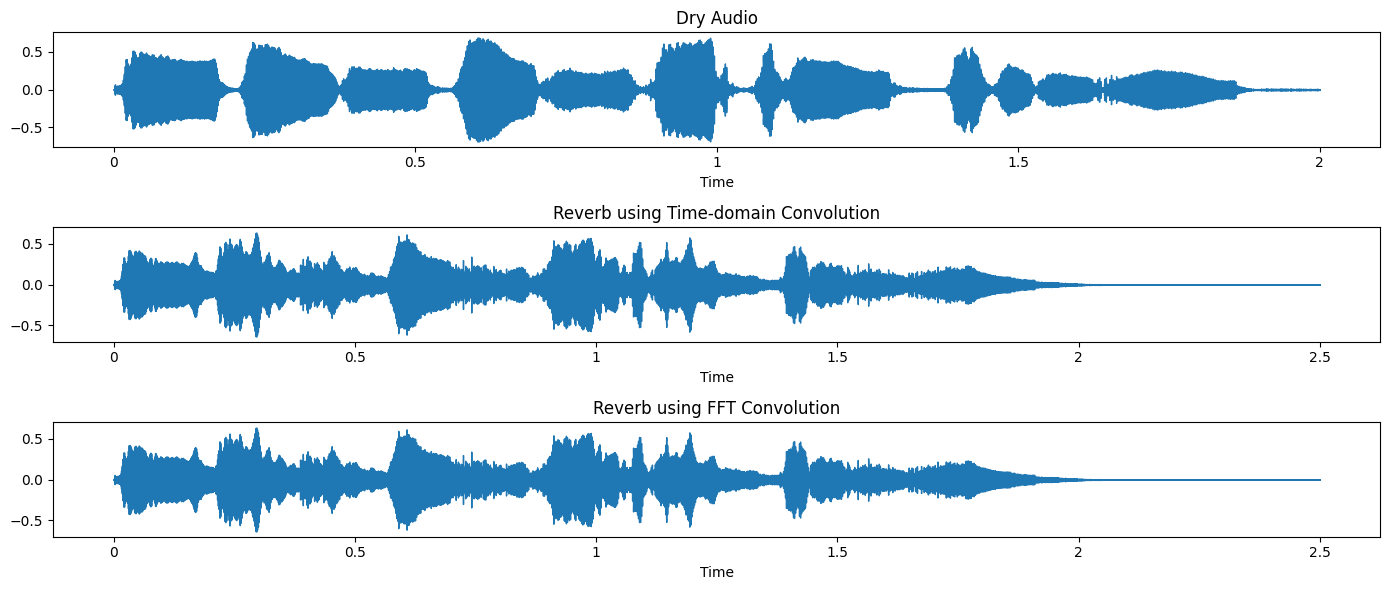

In [13]:
# 5. Plot waveforms
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.title("Dry Audio")
librosa.display.waveshow(dry_audio, sr=sr)

plt.subplot(3, 1, 2)
plt.title("Reverb using Time-domain Convolution")
librosa.display.waveshow(reverb_time, sr=sr)

plt.subplot(3, 1, 3)
plt.title("Reverb using FFT Convolution")
librosa.display.waveshow(reverb_fft, sr=sr)

plt.tight_layout()
plt.show()

In [14]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'reverberated_signal' is your convolved audio
# and 'sr' is the sampling rate

# Generate spectrogram (Short-Time Fourier Transform)
D = librosa.stft(reverberated_signal)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Reverberated Audio')
plt.tight_layout()
plt.show()

NameError: name 'reverberated_signal' is not defined

In [15]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'reverberated_signal' is your convolved audio
# and 'sr' is the sampling rate

# Generate spectrogram (Short-Time Fourier Transform)
D = librosa.stft(reverberated_audio)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Reverberated Audio')
plt.tight_layout()
plt.show()

NameError: name 'reverberated_audio' is not defined

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio (you can replace with your variable or file path)
# Example: if you already have reverberated_signal and sr, skip this line
# reverberated_signal, sr = librosa.load('your_audio_file.wav', sr=None)

# Compute spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(reverberated_signal)), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log Frequency Scale)')
plt.tight_layout()
plt.show()

NameError: name 'reverberated_signal' is not defined

In [17]:
import librosa

reverberated_signal, sr = librosa.load('/content/audio_reverb.wav', sr=None)

<ipython-input-17-3654813258>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  reverberated_signal, sr = librosa.load('/content/audio_reverb.wav', sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/audio_reverb.wav'

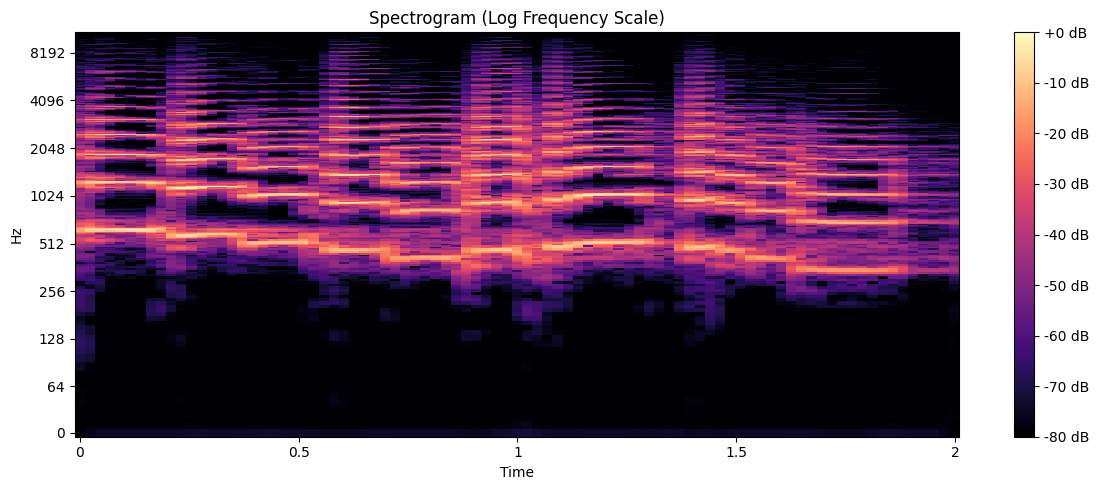

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load your audio file (replace with your path or use an uploaded file)
audio_path = '/content/dry_audio.wav'  # Make sure this is correct!
signal, sr = librosa.load(audio_path, sr=None)  # sr=None keeps original sampling rate

# Compute Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log Frequency Scale)')
plt.tight_layout()
plt.show()

In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [20]:
# 1. Load a dry audio sample (Librosa's built-in file)
dry_audio, sr = librosa.load(librosa.ex('trumpet'))


In [21]:
# 2. Create a simple synthetic impulse response (IR)
# A short exponential decay to simulate a room response
t = np.linspace(0, 1, int(sr * 1))  # 1-second impulse response
impulse_response = np.exp(-3 * t) * np.random.randn(len(t)) * 0.1
impulse_response[0] = 1  # initial peak for the impulse

In [22]:
# 3. Convolve the dry audio with the impulse response
reverberated_audio = scipy.signal.fftconvolve(dry_audio, impulse_response, mode='full')
reverberated_audio = reverberated_audio[:len(dry_audio)]  # trim to original length


Text(0.5, 1.0, 'Reverberated Audio - Waveform')

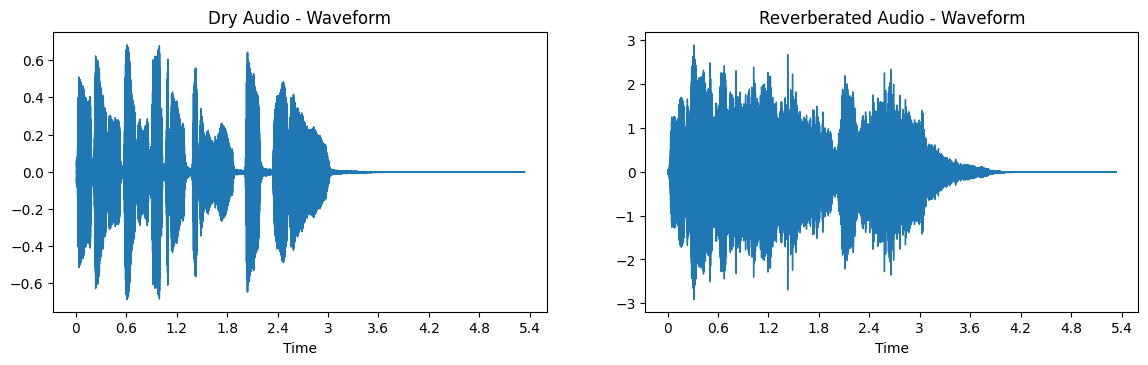

In [23]:
# --- Plotting section ---
plt.figure(figsize=(14, 8))

# Plot 1 - Dry waveform
plt.subplot(2, 2, 1)
librosa.display.waveshow(dry_audio, sr=sr)
plt.title('Dry Audio - Waveform')

# Plot 2 - Reverberated waveform
plt.subplot(2, 2, 2)
librosa.display.waveshow(reverberated_audio, sr=sr)
plt.title('Reverberated Audio - Waveform')


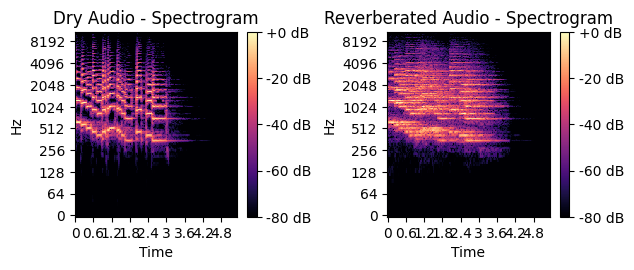

In [24]:
# Convert to spectrograms
dry_spec = librosa.amplitude_to_db(np.abs(librosa.stft(dry_audio)), ref=np.max)
reverb_spec = librosa.amplitude_to_db(np.abs(librosa.stft(reverberated_audio)), ref=np.max)

# Plot 3 - Dry spectrogram
plt.subplot(2, 2, 3)
librosa.display.specshow(dry_spec, sr=sr, x_axis='time', y_axis='log')
plt.title('Dry Audio - Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot 4 - Reverberated spectrogram
plt.subplot(2, 2, 4)
librosa.display.specshow(reverb_spec, sr=sr, x_axis='time', y_axis='log')
plt.title('Reverberated Audio - Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.signal

# 1. Generate a dry synthetic sine wave speech-like signal
sr = 16000  # Sample rate
duration = 2.0  # seconds
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
dry_signal = 0.5 * np.sin(2 * np.pi * 220 * t)  # 220 Hz tone (like a male voice pitch)

In [2]:
# 2. Apply artificial reverb (simple impulse response simulation)
impulse_response = np.zeros(5000)
impulse_response[0] = 1.0
impulse_response[1500] = 0.5
impulse_response[3000] = 0.25
reverb_signal = np.convolve(dry_signal, impulse_response)[:len(dry_signal)]


In [3]:
# 3. Extract MFCCs
dry_mfcc = librosa.feature.mfcc(y=dry_signal, sr=sr, n_mfcc=13)
reverb_mfcc = librosa.feature.mfcc(y=reverb_signal, sr=sr, n_mfcc=13)

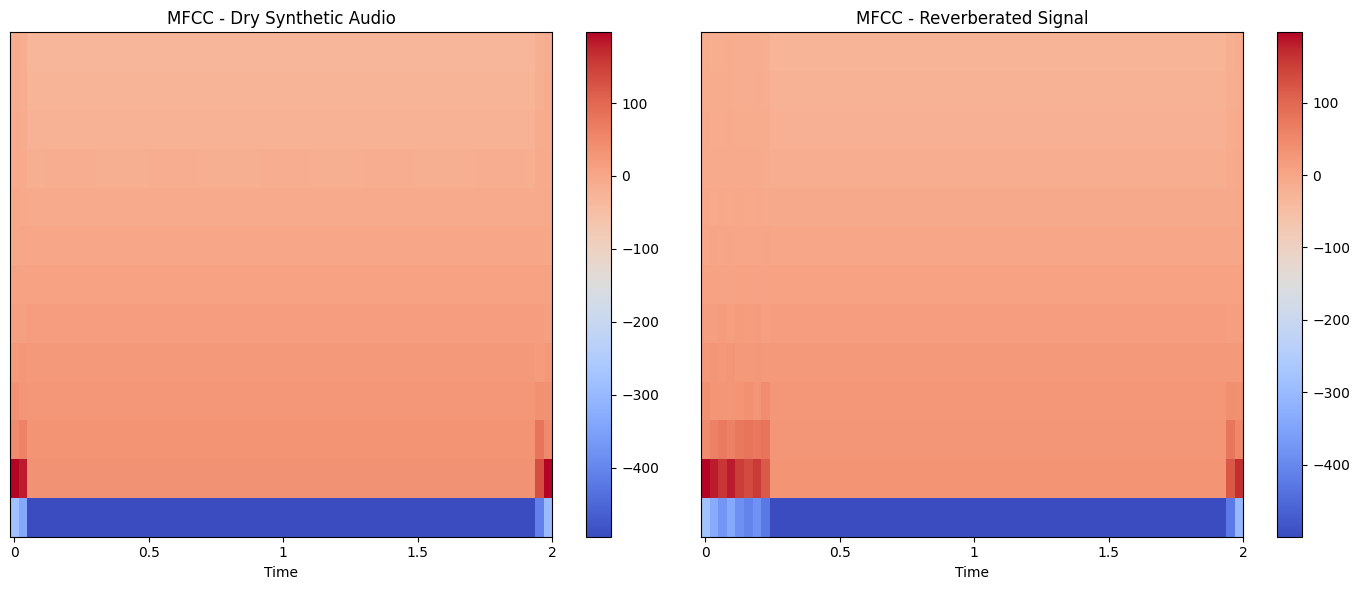

In [4]:
# 4. Plot MFCCs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(dry_mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC - Dry Synthetic Audio')

plt.subplot(1, 2, 2)
librosa.display.specshow(reverb_mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC - Reverberated Signal')

plt.tight_layout()
plt.show()

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dry_audio, sr = librosa.load("dry.wav")
reverb_audio, _ = librosa.load("reverb.wav")

<ipython-input-6-3041893217>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  dry_audio, sr = librosa.load("dry.wav")
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'dry.wav'

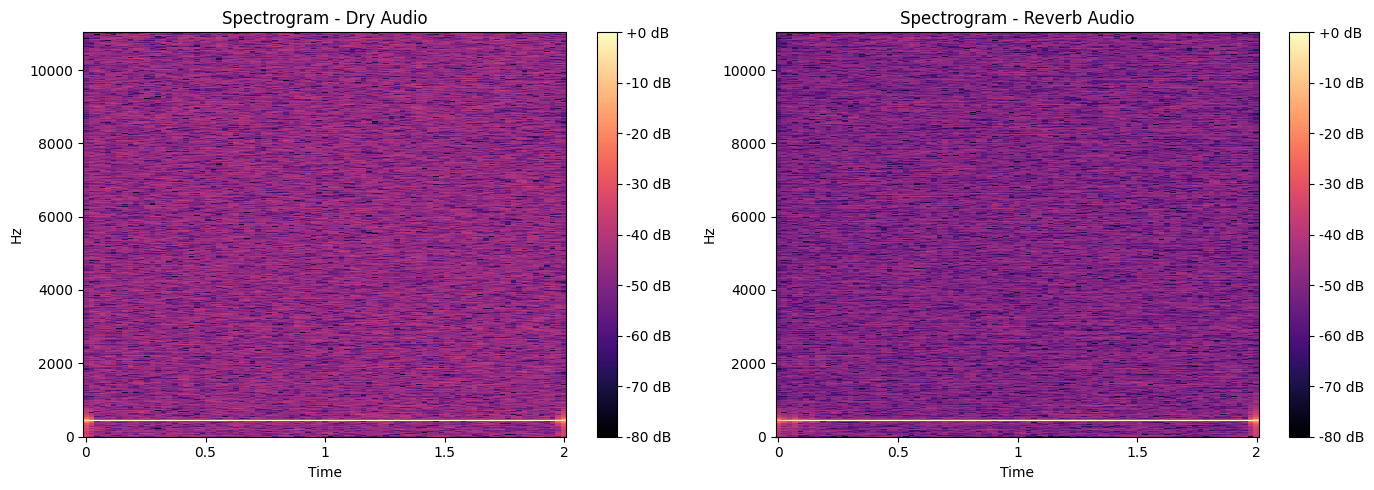

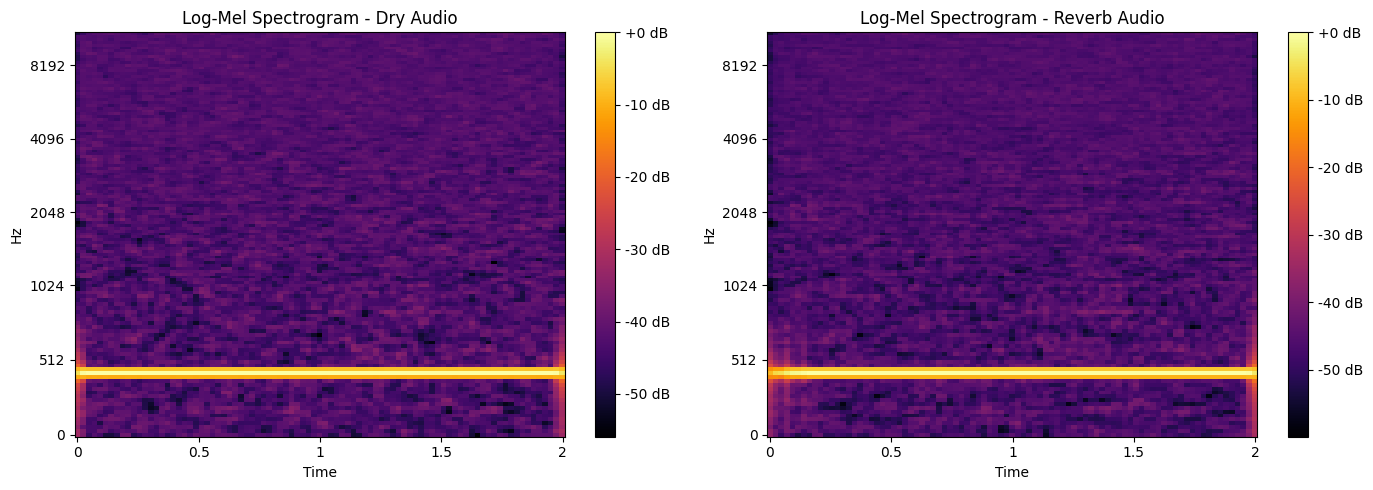

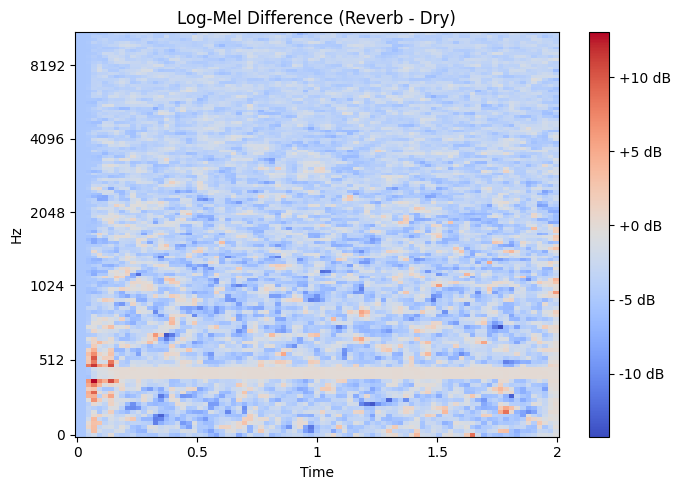

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

# --------- STEP 1: Generate Synthetic "Dry" Audio (Sine wave + noise) ----------
sr = 22050  # sample rate
duration = 2.0  # seconds
t = np.linspace(0, duration, int(sr*duration), endpoint=False)

# Dry audio = sine + noise
freq = 440  # A4 note
dry_audio = 0.5 * np.sin(2 * np.pi * freq * t) + 0.05 * np.random.randn(len(t))

# --------- STEP 2: Simulate Reverb using a filter (simple impulse response) ----------
impulse = np.zeros(5000)
impulse[0] = 1
impulse[1500] = 0.6
impulse[3000] = 0.3

reverb_audio = scipy.signal.fftconvolve(dry_audio, impulse, mode='full')[:len(dry_audio)]

# --------- STEP 3: Plot Spectrogram ----------
plt.figure(figsize=(14, 5))

# Dry
plt.subplot(1, 2, 1)
D_dry = librosa.amplitude_to_db(np.abs(librosa.stft(dry_audio)), ref=np.max)
librosa.display.specshow(D_dry, sr=sr, x_axis='time', y_axis='linear', cmap='magma')
plt.title('Spectrogram - Dry Audio')
plt.colorbar(format="%+2.0f dB")

# Reverb
plt.subplot(1, 2, 2)
D_reverb = librosa.amplitude_to_db(np.abs(librosa.stft(reverb_audio)), ref=np.max)
librosa.display.specshow(D_reverb, sr=sr, x_axis='time', y_axis='linear', cmap='magma')
plt.title('Spectrogram - Reverb Audio')
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

# --------- STEP 4: Log-Mel Spectrogram ----------
plt.figure(figsize=(14, 5))

# Dry
plt.subplot(1, 2, 1)
S_dry = librosa.feature.melspectrogram(y=dry_audio, sr=sr, n_mels=128)
log_S_dry = librosa.power_to_db(S_dry, ref=np.max)
librosa.display.specshow(log_S_dry, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
plt.title('Log-Mel Spectrogram - Dry Audio')
plt.colorbar(format='%+2.0f dB')

# Reverb
plt.subplot(1, 2, 2)
S_reverb = librosa.feature.melspectrogram(y=reverb_audio, sr=sr, n_mels=128)
log_S_reverb = librosa.power_to_db(S_reverb, ref=np.max)
librosa.display.specshow(log_S_reverb, sr=sr, x_axis='time', y_axis='mel', cmap='inferno')
plt.title('Log-Mel Spectrogram - Reverb Audio')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

# --------- STEP 5: Difference (Optional)
plt.figure(figsize=(7, 5))
diff = log_S_reverb - log_S_dry
librosa.display.specshow(diff, sr=sr, x_axis='time', y_axis='mel', cmap='coolwarm')
plt.title('Log-Mel Difference (Reverb - Dry)')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [8]:
import librosa
import numpy as np

def extract_logmel_features(audio, sr=22050, n_mels=128, hop_length=512):
    # Step 1: Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_mels=n_mels, hop_length=hop_length)

    # Step 2: Convert to log scale
    logmel = librosa.power_to_db(mel_spec, ref=np.max)

    return logmel

In [9]:
def normalize(logmel):
    mean = np.mean(logmel)
    std = np.std(logmel)
    return (logmel - mean) / std

In [10]:
def prepare_input_for_nn(logmel):
    # Add a channel dimension (1 for grayscale-like input)
    return np.expand_dims(logmel, axis=0)  # shape = (1, n_mels, time_frames)

In [11]:
def process_audio_for_nn(audio, sr=22050):
    logmel = extract_logmel_features(audio, sr)
    norm_logmel = normalize(logmel)
    nn_input = prepare_input_for_nn(norm_logmel)
    return nn_input

In [12]:
# Dry input
nn_input_dry = process_audio_for_nn(dry_audio)

# Reverb input
nn_input_reverb = process_audio_for_nn(reverb_audio)

print("Input shape for neural net:", nn_input_dry.shape)

Input shape for neural net: (1, 128, 87)


In [13]:
import matplotlib.pyplot as plt
import librosa.display

# Plot the log-mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(logmel, sr=sr, hop_length=512,
                         x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()

NameError: name 'logmel' is not defined

<Figure size 1000x400 with 0 Axes>

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Assuming dry_audio and sr are already loaded

# 1. Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(dry_audio)[0]

In [15]:
# 2. Spectral Centroid
spec_centroid = librosa.feature.spectral_centroid(y=dry_audio, sr=sr)[0]

In [16]:
# 3. Spectral Rolloff
spec_rolloff = librosa.feature.spectral_rolloff(y=dry_audio, sr=sr)[0]

In [17]:
# 4. Chroma Features
chroma = librosa.feature.chroma_stft(y=dry_audio, sr=sr)


In [18]:
# 5. MFCC and Delta
mfcc = librosa.feature.mfcc(y=dry_audio, sr=sr, n_mfcc=13)
delta_mfcc = librosa.feature.delta(mfcc)

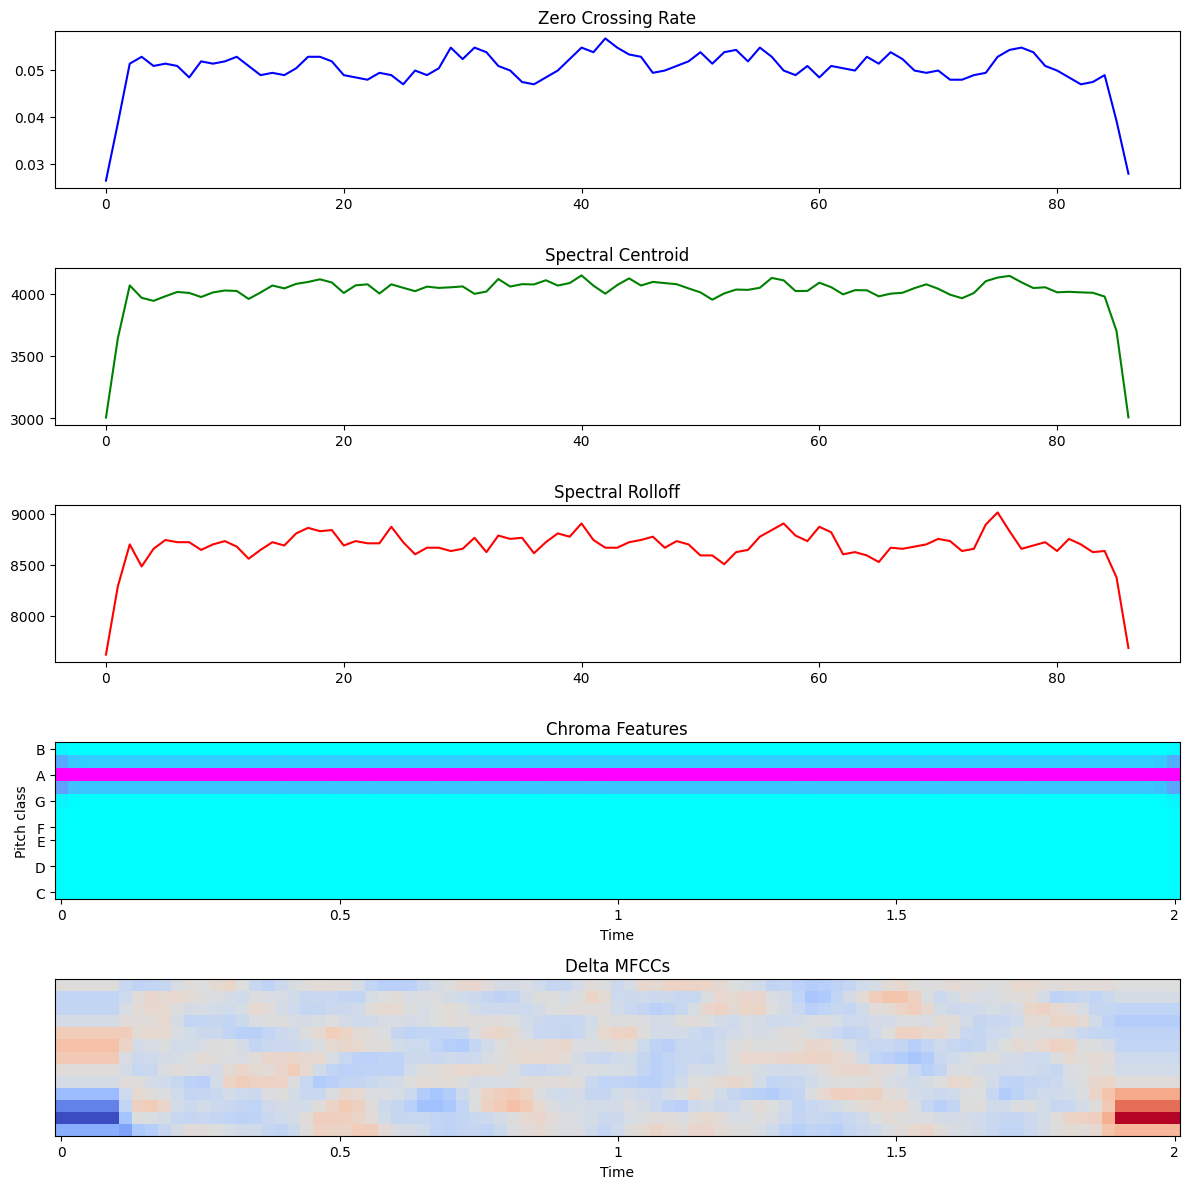

In [19]:
# ----------- Plotting Section ------------

plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.plot(zcr, color='blue')
plt.title('Zero Crossing Rate')

plt.subplot(5, 1, 2)
plt.plot(spec_centroid, color='green')
plt.title('Spectral Centroid')

plt.subplot(5, 1, 3)
plt.plot(spec_rolloff, color='red')
plt.title('Spectral Rolloff')

plt.subplot(5, 1, 4)
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='cool')
plt.title('Chroma Features')

plt.subplot(5, 1, 5)
librosa.display.specshow(delta_mfcc, sr=sr, x_axis='time')
plt.title('Delta MFCCs')

plt.tight_layout()
plt.show()